# Лабораторная работа №3: Сегментация изображений
Выполнила: студентка гр. 1384 Усачева Дарья.

## Задача
Реализовать на языке Python  с использованием библиотеки OpenCV программу, выполняющее сегментацию/кластеризацию изображения по цвету с использованием метода  K-Means.

## Входные данные
1.	цветное изображение в формате bmp, jpg 
2.	количество кластеров

## Выходные данные
1.	цветное изображение в формате bmp (result.bmp), являющиеся результатом сегментации (сегмент окрашивается средним цветов в кластере).

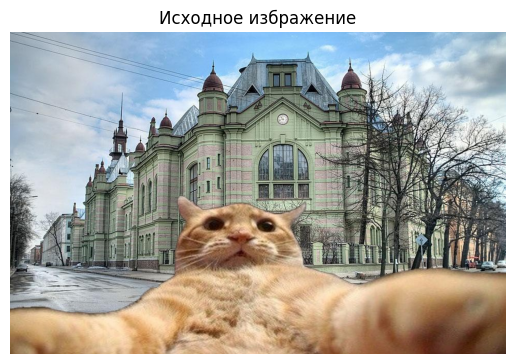

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '3.jpg'
count = 5
image = cv2.imread(image_path)
if image is None:
    print("Не удалось загрузить изображение.")
def display_image(image, title=''):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
display_image(image, "Исходное избражение")

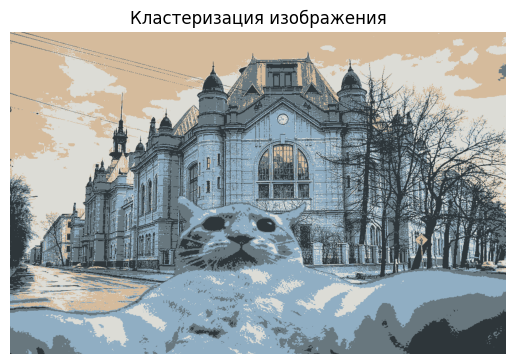

In [ ]:
def kmeans_segmentation(image, k):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_values = image_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.3)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_rgb.shape)
    return segmented_image

display_image(kmeans_segmentation(image, count),"Кластеризация изображения")
cv2.imwrite('result.bmp', kmeans_segmentation(image, count))